# OLS - Wooldridge Computer Exercise
## Chapter 3, Exercise 9

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/
- VIF: https://etav.github.io/python/vif_factor_python.html
- VIF: https://en.wikipedia.org/wiki/Variance_inflation_factor

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Latex markup language 
from IPython.display import Latex

# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_stata('C://Users//a1000391//Desktop//Machine Learning Lab//Pandas//firepit-master//charity.dta')
print(df1.head())

   respond  gift  resplast   weekslast  propresp  mailsyear  giftlast  avggift
0        0     0         0  143.000000       0.3        2.5        10     10.0
1        0     0         0   65.428574       0.3        2.5        10     10.0
2        0     0         1   13.142858       0.3        2.5        10     10.0
3        0     0         0  120.142860       0.3        2.5        10     10.0
4        1    10         0  103.857140       0.2        2.5        10     10.0
Wall time: 46 ms


In [3]:
df1['constant'] = 1

# Data Checks
- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4268 entries, 0 to 4267
Data columns (total 9 columns):
respond      4268 non-null int8
gift         4268 non-null int16
resplast     4268 non-null int8
weekslast    4268 non-null float32
propresp     4268 non-null float32
mailsyear    4268 non-null float32
giftlast     4268 non-null int16
avggift      4268 non-null float32
constant     4268 non-null int64
dtypes: float32(4), int16(2), int64(1), int8(2)
memory usage: 158.4 KB
Wall time: 6.95 ms


### Estimate: $gift = \beta_{0} + \beta_{1}mailsyear + \beta_{2}giftlast + \beta_{3}propresp + \mu$

In [17]:
formula = '''gift ~ mailsyear + giftlast + propresp
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

                  sum_sq      df           F        PR(>F)
mailsyear    8864.155559     1.0   42.592739  7.529112e-11
giftlast     3562.889837     1.0   17.119875  3.576994e-05
propresp    64186.929038     1.0  308.421605  1.022183e-66
Residual   887399.134315  4264.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     129.3
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           3.86e-80
Time:                        14:57:33   Log-Likelihood:                -17446.
No. Observations:                4268   AIC:                         3.490e+04
Df Residuals:                    4264   BIC:                         3.492e+04
Df Model:                           3                                    

### Estimate: $gift = \beta_{0} + \beta_{1}mailsyear + \beta_{2}giftlast + \beta_{3}propresp + \beta_{4}avggift + \mu$

In [14]:
formula = '''gift ~ mailsyear + giftlast + propresp + avggift
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results2 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

                  sum_sq      df           F         PR(>F)
mailsyear    2683.739119     1.0   14.782086   1.224363e-04
giftlast   106775.055328     1.0  588.119048  8.140719e-122
propresp    71330.769374     1.0  392.891243   1.030457e-83
avggift    113436.681290     1.0  624.811411  8.391669e-129
Residual   773962.453025  4263.0         NaN            NaN
                            OLS Regression Results                            
Dep. Variable:                   gift   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     267.3
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          2.82e-205
Time:                        14:56:17   Log-Likelihood:                -17154.
No. Observations:                4268   AIC:                         3.432e+04
Df Residuals:                    4263   BIC:                         3.435e+04
Df Model

In [18]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([results,results2],stars=True)
print(dfoutput)


            gift I    gift II  
-------------------------------
Intercept -4.5515*** -7.3278***
          (0.8030)   (0.7582)  
avggift              0.5269*** 
                     (0.0211)  
giftlast  0.0059***  -0.2609***
          (0.0014)   (0.0108)  
mailsyear 2.1663***  1.2012*** 
          (0.3319)   (0.3124)  
propresp  15.3586*** 16.2046***
          (0.8745)   (0.8175)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Check for Multicollinearity
## Step 1: Run a multiple regression

In [7]:
%%capture

# get y and X dataframes based on this regression:
y, X = dmatrices(formula, df1, return_type='dataframe')

## Step 2: Calculate VIF Factors

In [8]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['mailsyear','giftlast','propresp','avggift'] = X.columns

## Step 3: Inspect VIF Factors
- Values > 10 indicate presence of significant multicollinearity

In [9]:
vif.round(1)

,VIF Factor,"(mailsyear, giftlast, propresp, avggift)"
0,13.5,Intercept
1,1.0,mailsyear
2,64.7,giftlast
3,1.0,propresp
4,64.7,avggift


In [12]:
df1.corr(method ='pearson') 

,respond,gift,resplast,weekslast,propresp,mailsyear,giftlast,avggift,constant
respond,1.000000,0.605444,0.330859,-0.360613,0.443219,0.117981,0.021508,0.021975,NaN
gift,0.605444,1.000000,0.201906,-0.219913,0.265400,0.117429,0.057905,0.100448,NaN
resplast,0.330859,0.201906,1.000000,-0.585306,0.619563,0.022452,-0.009108,-0.008143,NaN
weekslast,-0.360613,-0.219913,-0.585306,1.000000,-0.634895,-0.181556,0.027397,0.027697,NaN
propresp,0.443219,0.265400,0.619563,-0.634895,1.000000,0.081428,-0.013043,-0.016842,NaN
mailsyear,0.117981,0.117429,0.022452,-0.181556,0.081428,1.000000,0.006273,0.021336,NaN
giftlast,0.021508,0.057905,-0.009108,0.027397,-0.013043,0.006273,1.000000,0.992113,NaN
avggift,0.021975,0.100448,-0.008143,0.027697,-0.016842,0.021336,0.992113,1.000000,NaN
constant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


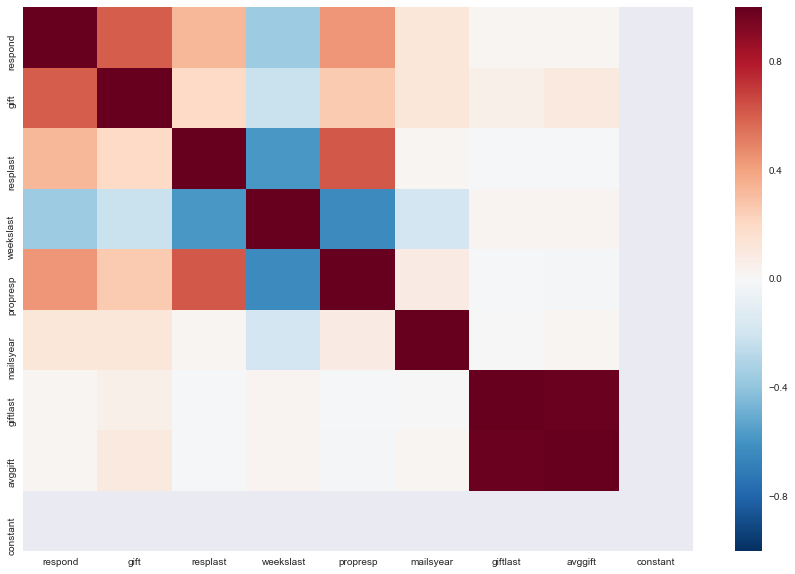

In [13]:
corr = df1.corr(method ='pearson') 
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Residual Plotting
- First add some setup variables from the "results" model output.

In [8]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

# Residual Plot
## non-linear plot line indicative of non-linear relationship not captured in model

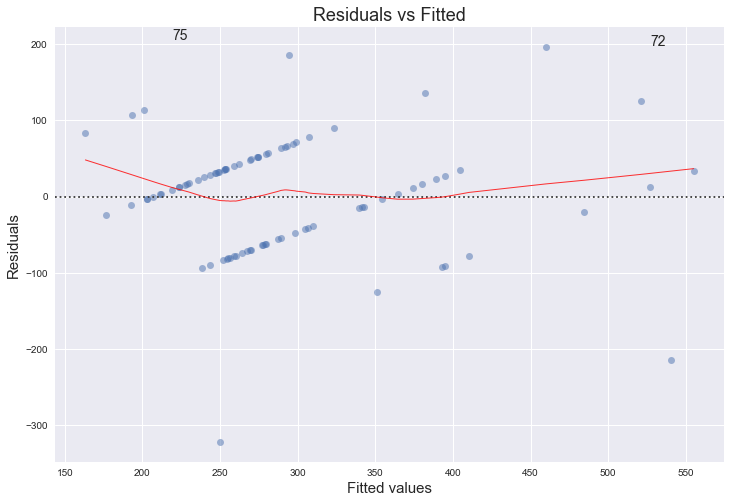

In [10]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sqrft', data=df1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot
- residuals following plot line well indicative of normally distributed residuals
- residuals that deviate sharply indicative of non-normally distributed residuals

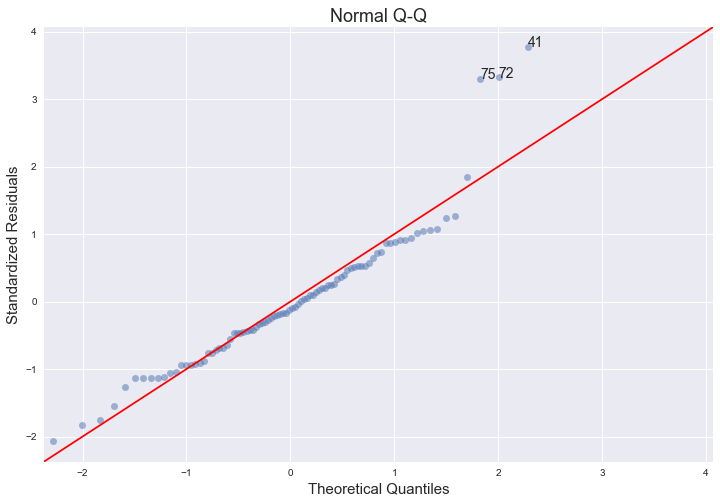

In [11]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Scale Location Plot
## indicative of homoscedastic residuals
- Good to see even spread with horizontal line
- Bad to see sloped line with spread following a pattern

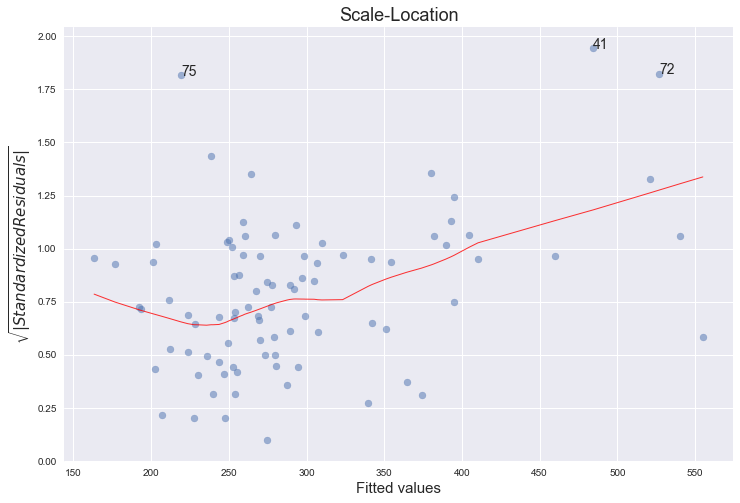

In [12]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# Leverage Plot
## helps us find influential cases (outliers)

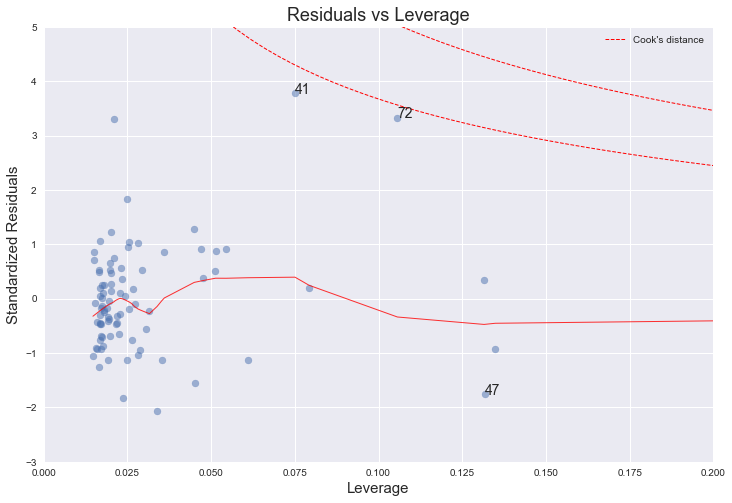

In [13]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');


In [14]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 10.576317641010533),
 ('p-value', 0.005051051596182841),
 ('f-value', 5.805633186739767),
 ('f p-value', 0.004331356313102725)]

In [15]:
print("Heteroscedasticity Test - Goldfeld Quandt")
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)



Heteroscedasticity Test - Goldfeld Quandt


[('F statistic', 1.1262087375952903), ('p-value', 0.3526766006136152)]

In [23]:
# Multicolinearity
np.linalg.cond(results.model.exog)

8.33883366285138

# Data Explorations

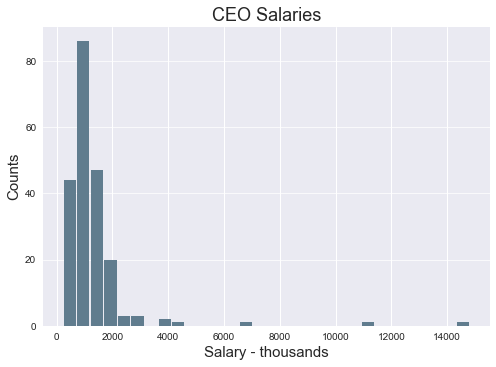

In [13]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.salary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

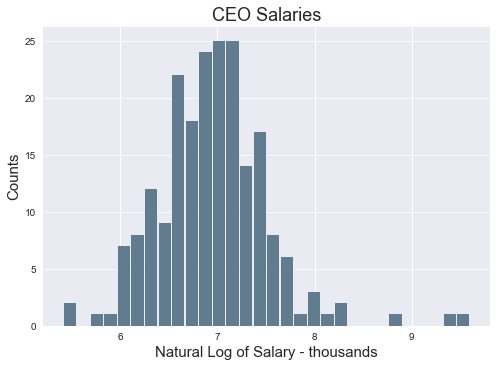

In [14]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.lsalary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Natural Log of Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# Non-Linearities: Functional Form
## Log(Salary) regressed on Log(Sales)

In [31]:
formula = '''lsalary ~ (lsales)
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())


             sum_sq     df         F        PR(>F)
lsales    14.066171    1.0  55.29659  2.703389e-12
Residual  52.656002  207.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           2.70e-12
Time:                        19:26:35   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   